In [2]:
# data processing
import numpy as np
import pandas as pd
import re
#visiulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
train = pd.read_csv('/home/baitong/Data/all/train.csv')
test = pd.read_csv('/home/baitong/Data/all/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
train.describe(include=['O'])#['O'] indicates category feature

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"White, Mr. Percival Wayland",male,347082,G6,S
freq,1,577,7,4,644


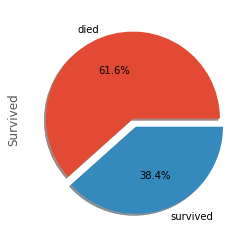

In [22]:
survive_num = train.Survived.value_counts()
survive_num.plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=['died','survived'],shadow=True)
plt.show()


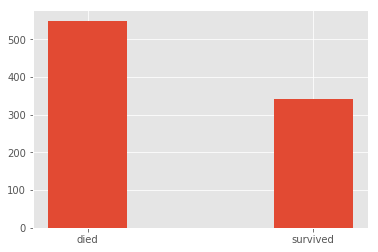

In [23]:
x=[0,1]
plt.bar(x,survive_num,width=0.35)
plt.xticks(x,('died','survived'))
plt.show()

In [24]:
num_f = [f for f in train.columns if train.dtypes[f] != 'object']
cat_f = [f for f in train.columns if train.dtypes[f]=='object']
print('there are %d numerical features:'%len(num_f),num_f)
print('there are %d category features:'%len(cat_f),cat_f)

there are 7 numerical features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
there are 5 category features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [25]:
train.groupby(['Sex'])['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

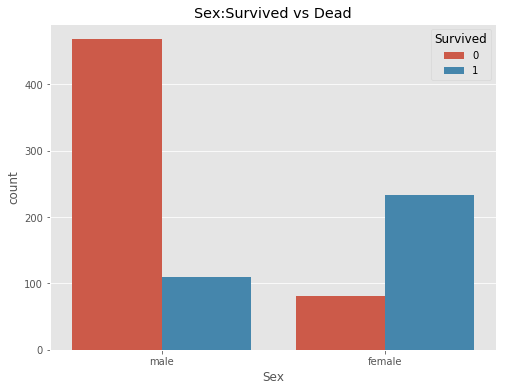

In [26]:
f,ax = plt.subplots(figsize=(8,6))
fig = sns.countplot(x='Sex',hue='Survived',data=train)
fig.set_title('Sex:Survived vs Dead')
plt.show()

In [27]:
train.groupby(['Sex'])['Survived'].sum()/train.groupby(['Sex'])['Survived'].count()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

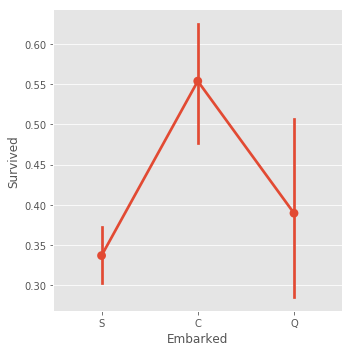

In [32]:
sns.catplot('Embarked','Survived',data=train,kind = 'point')
plt.show()

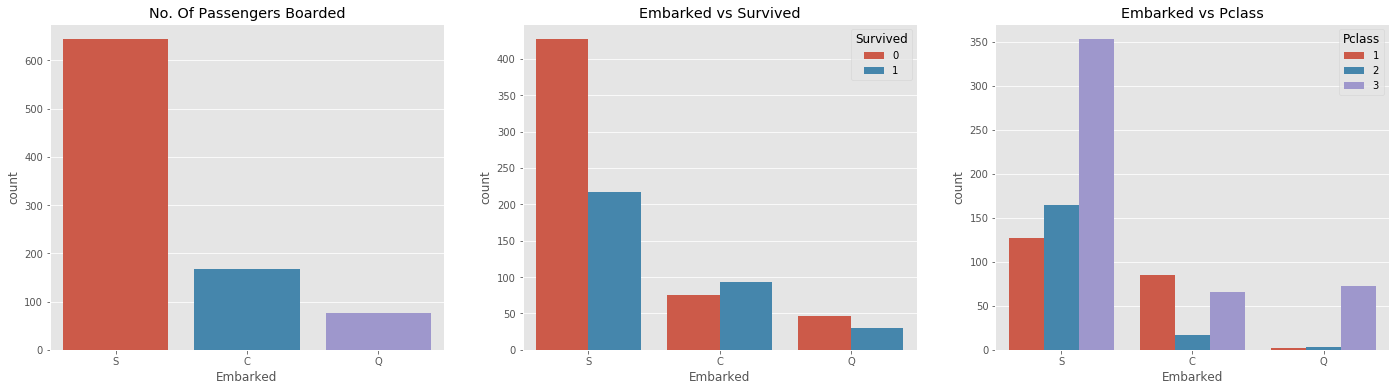

In [33]:
f,ax = plt.subplots(1,3,figsize=(24,6))
sns.countplot('Embarked',data=train,ax=ax[0])
ax[0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[2])
ax[2].set_title('Embarked vs Pclass')
#plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

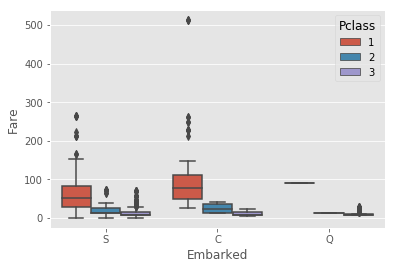

In [34]:
#pd.pivot_table(train,index='Embarked',columns='Pclass',values='Fare')
sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=train)
plt.show()

In [35]:
train.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

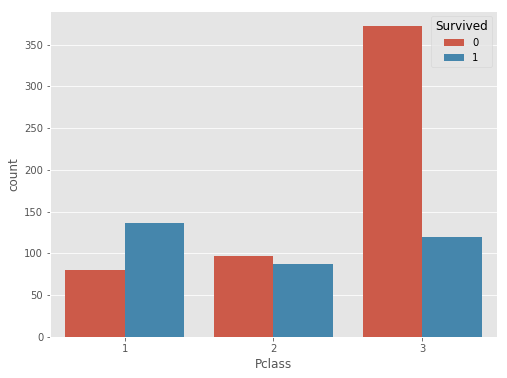

In [36]:
plt.subplots(figsize=(8,6))
f = sns.countplot('Pclass',hue='Survived',data=train)

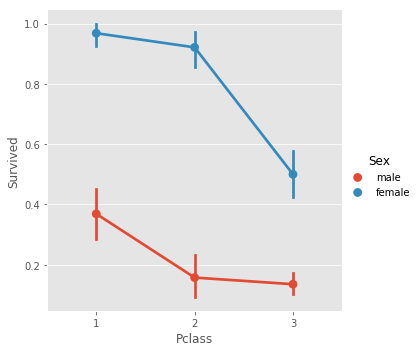

In [38]:
sns.catplot('Pclass','Survived',hue='Sex',data=train,kind = 'point')
plt.show()

In [39]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


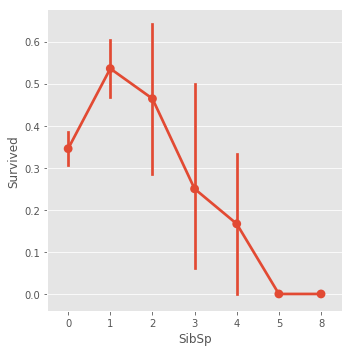

In [40]:
sns.catplot('SibSp','Survived',data=train,kind = 'point')
plt.show()

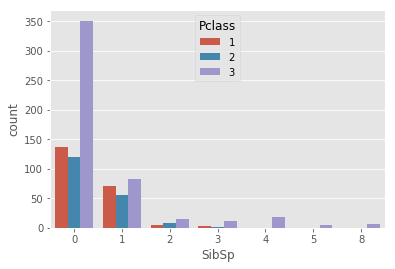

In [41]:
#pd.pivot_table(train,values='Survived',index='SibSp',columns='Pclass')
sns.countplot(x='SibSp',hue='Pclass',data=train)
plt.show()

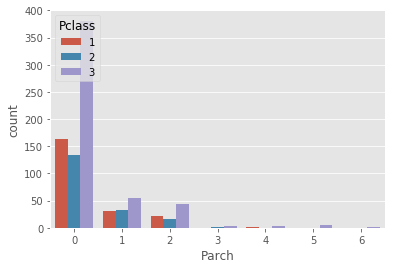

In [42]:
#pd.pivot_table(train,values='Survived',index='Parch',columns='Pclass')
sns.countplot(x='Parch',hue='Pclass',data=train)
plt.show()

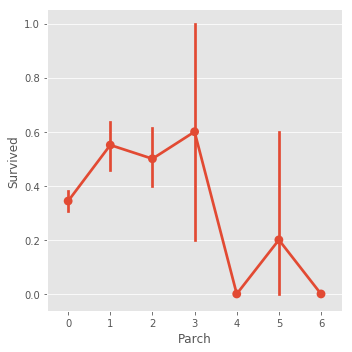

In [44]:
sns.catplot('Parch','Survived',data=train, kind = "point")
plt.show()

In [45]:
train.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


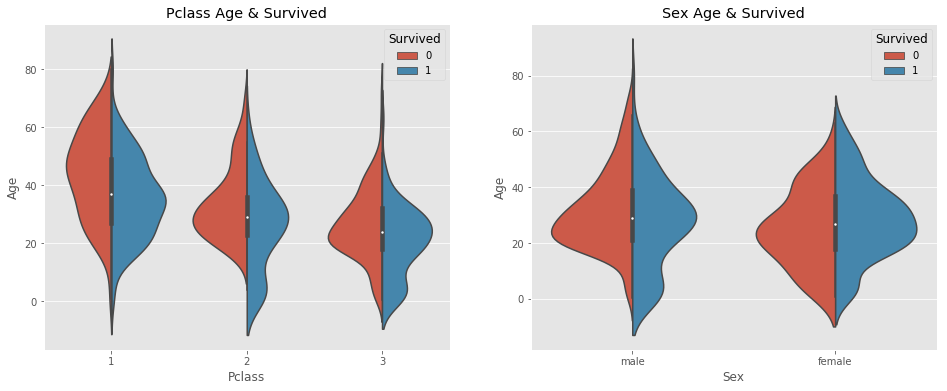

In [46]:
f,ax = plt.subplots(1,2,figsize=(16,6))
sns.violinplot('Pclass','Age',hue='Survived',data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass Age & Survived')
sns.violinplot('Sex','Age',hue='Survived',data=train,split=True,ax=ax[1])
ax[1].set_title('Sex Age & Survived')
plt.show()

In [52]:
#用正则表达式帮助找出姓名中表示年龄的title
def getTitle(data):

    name_sal = []
    for i in range(len(data['Name'])):
        name_sal.append(re.findall(r'.\w*\.',data.Name[i]))
    #print(name_sal)
    Salut = []
    for i in range(len(name_sal)):
        name = str(name_sal[i])
        name = name[1:-1].replace("'","")
        name = name.replace(".","").strip()
        name = name.replace(" ","")
        Salut.append(name)

    data['Title'] = Salut

getTitle(train)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [50]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [53]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

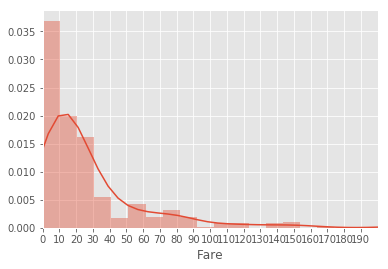

In [54]:
sns.distplot(train['Fare'].dropna())
plt.xlim((0,200))
plt.xticks(np.arange(0,200,10))
plt.show()

In [59]:
#合并训练集和测试集
passID = test['PassengerId']
all_data = pd.concat([train,test],keys=["train","test"])
all_data.shape
#all_data.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


(1309, 13)

In [60]:
all_data.drop(['PassengerId','Cabin'],axis=1,inplace=True)

In [61]:
all_data.head(2)

Age Embarked     Fare  \
train 0  22.0        S   7.2500   
      1  38.0        C  71.2833   

                                                      Name  Parch  Pclass  \
train 0                            Braund, Mr. Owen Harris      0       3   
      1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1   

            Sex  SibSp  Survived     Ticket Title  
train 0    male      1       0.0  A/5 21171    Mr  
      1  female      1       1.0   PC 17599   Mrs

In [62]:
#先提取name中的title
getTitle(all_data)

In [63]:
pd.crosstab(all_data['Title'], all_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
